Importing

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy as sp
from scipy.integrate import odeint

Creating the function for the ODE

In [89]:
def model(z, t, betaD, betaR, v, n, m, k, M):
    D = z[:k]
    R = z[k:2*k]
    D_n = M@z[:k]
    dDdT = v * (betaD / (1 + R ** n) - D)
    dRdt = betaR * D_n**m / (1 + D_n**m) -R
    return np.ravel([dDdT, dRdt])

Setting up the parameters

In [90]:
t = np.linspace(0, 10, 100)
n = 3
m = 3
k = 10
betaD = 10
betaR = 10
v = 1
M = np.zeros((k, k))
for i in range(k-1):
    M[i, i-1] = 1
    M[i, i+1] = 1

In [91]:
M

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Initial conditions

In [92]:
D0 = 1e-5 * np.random.random((1, k))
R0 = np.zeros((1, k))
z0 = np.ravel([D0, R0])

Solving the ODE

In [93]:
z = odeint(model, z0, t, args=(n, m, betaD, betaR, v, k, M))
D = z[:, :k]
R = z[:, k:2*k]

In [94]:
z

array([[1.35702309e-06, 8.29888693e-06, 6.83030982e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90745391e+00, 1.90745643e+00, 1.90745590e+00, ...,
        1.84262821e-01, 1.84262942e-01, 0.00000000e+00],
       [2.60206339e+00, 2.60206431e+00, 2.60206412e+00, ...,
        4.03385365e-01, 4.03385546e-01, 0.00000000e+00],
       ...,
       [2.37523955e-04, 3.00000000e+00, 2.37738704e-04, ...,
        1.75000125e-03, 2.57123407e+00, 0.00000000e+00],
       [2.37504372e-04, 3.00000000e+00, 2.37695820e-04, ...,
        1.71877966e-03, 2.57125276e+00, 0.00000000e+00],
       [2.37486971e-04, 3.00000000e+00, 2.37660823e-04, ...,
        1.69054017e-03, 2.57126965e+00, 0.00000000e+00]])

Plotting

Text(0.5, 0.98, 'Lateral Inhibition Model for a Line of Cells')

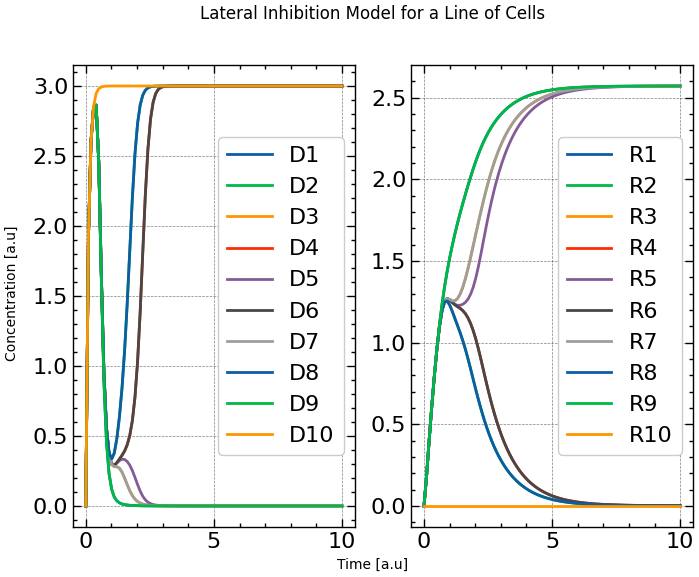

In [95]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 6))
ax[0].plot(t, D)
ax[0].legend(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])
ax[1].plot(t, R)
ax[1].legend(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10'])
fig.text(0.5, 0.04, 'Time [a.u]', ha='center')
fig.text(0.04, 0.5, 'Concentration [a.u]', va='center', rotation='vertical')
fig.suptitle('Lateral Inhibition Model for a Line of Cells')